In [1]:
#%matplotlib widget
#%matplotlib ipympl
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

'''
from matplotlib.ticker import LogFormatter 
from matplotlib import ticker, cm
import matplotlib as mpl
import copy
import os
import h5py
import json
import PyPDF2                       
import glob                         
from collections.abc import Iterable
import succolib as suc
import math
'''

import sys 
Swan_h = ("swan" in sys.executable) or ("cern" in sys.executable)
# print('Swan ', Swan_h)

In [2]:
######################## MATERIAL AND YEAR #####################
year = 2024
material = 'W_1.5mm'
######################## SET RUN NUMBER #####################
run = 720729
######################## SET CUT AND SELECTIONS #####################
Calibration = False

Cut_pos = True
Corr_Factor=0.6

th_calo = 0.1
th_cherry = 21

n_bin_calo = np.arange(th_calo,6.5,0.05)
bins_2d = [100,100]

chamb_dim = [0,10]

if Cut_pos:
    # pos_cut_x= [4.9 ,4.9+0.8] 
    # pos_cut_y= [4.65,4.65+0.8]
    if run in range(720686,720693):
        pos_cut_x=[5.2,5.8]
        pos_cut_y=[4.7,5.45]
        # pos_cut_x=[4.6,6]  ## LARGE TO BE SURE THAT THE NOT POS IS OUT
        # pos_cut_y=[4.5,6]  ## LARGE TO BE SURE THAT THE NOT POS IS OUT
    # elif run in range (720693,720700):
    #     pos_cut_x=[5.2,5.8]
    #     pos_cut_y=[4.7,5.55]
    else:
        pos_cut_x= [5,5.6] 
        pos_cut_y= [4.8,5.4]
        # pos_cut_x= [4.7,5.8]  ## LARGE TO BE SURE THAT THE NOT POS IS OUT
        # pos_cut_y= [4.5,5.6] ## LARGE TO BE SURE THAT THE NOT POS IS OUT 
else:
    pos_cut_x= chamb_dim
    pos_cut_y= chamb_dim
    
theta_crit = 570 #urad
# theta_cut = 3*theta_crit
theta_cut = 1000
# theta_cut = 100000


print(pos_cut_x,pos_cut_y)

[5, 5.6] [4.8, 5.4]


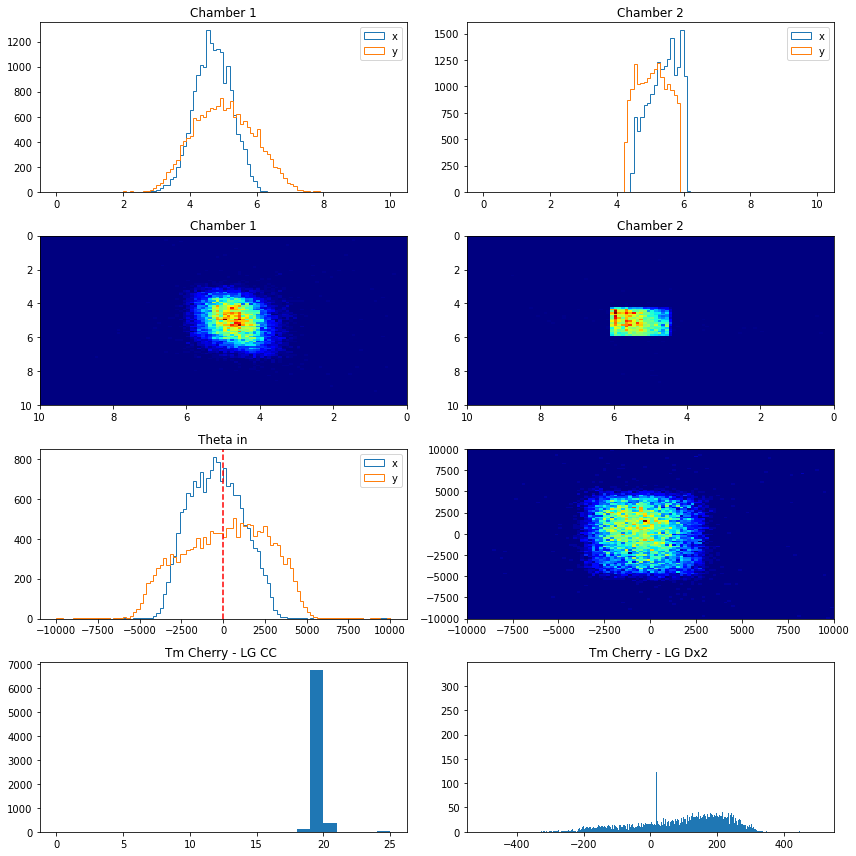

In [3]:
import Utils
from Utils import *
dizi, mycmap = configurator(year,material,Swan_h)

m = dizi['slope_Calo']
q = dizi['intercept_Calo']


labels = ['crystal']
pos,xinfo,ph,tm,evi,info_plus,\
Cherry1,Cherry2,Scinti_desy,Scinti_after_magnet,Calo_photon,Calo_elect1,Calo_elect2,Apc1,Apc2,\
x1,y1,x2,y2,x_cry,y_cry,theta_in_x,theta_in_y= file_corrector(run)
theta_in_x -= 2500
fig, ax = plt.subplots(4,2)
fig.set_size_inches(12, 12)

if Calibration:
    Calo_photon = (Calo_photon - q)/m
    Calo_elect1 = (Calo_elect1*3.8 - q)/m
    Calo_elect2 = (Calo_elect2*4.2- q)/m
    
logix = (x2>pos_cut_x[0]) & (x2<pos_cut_x[1])
logiy = (y2>pos_cut_y[0]) & (y2<pos_cut_y[1])

logi_pos = logix & logiy
logi_calo = (Calo_photon > th_calo)
logi_scinti = (Scinti_desy > 0.1)
logi_cherry = (Cherry1 > th_cherry)
logi_angle = ((theta_in_x)**2 + (theta_in_y)**2) < (theta_cut)**2

logi_time = ((tm[:,7]-tm[:,2]) < 21 ) & ((tm[:,7]-tm[:,2]) > 18)
# logi_time = ((tm[:,7]-tm[:,4]) < 21 ) & ((tm[:,7]-tm[:,4]) > 18)

logi = logi_pos

ax[0,0].hist(x1, bins=bins_2d[0],range=chamb_dim,histtype='step',label='x')
ax[0,0].hist(y1, bins=bins_2d[1],range=chamb_dim,histtype='step',label='y')
ax[1,0].hist2d(x1,y1, bins=bins_2d, cmap = mycmap,range=[chamb_dim,chamb_dim])
ax[0,0].set_title('Chamber 1')
ax[0,0].legend()
ax[1,0].set_title('Chamber 1')
ax[1,0].invert_xaxis()
ax[1,0].invert_yaxis()

ax[0,1].hist(x2, bins=bins_2d[0],range=chamb_dim,histtype='step',label='x')
ax[0,1].hist(y2, bins=bins_2d[1],range=chamb_dim,histtype='step',label='y')
ax[1,1].hist2d(x2,y2, bins=bins_2d, cmap = mycmap,range=[chamb_dim,chamb_dim])
ax[0,1].set_title('Chamber 2')
ax[0,1].legend()
ax[1,1].set_title('Chamber 2')
ax[1,1].invert_xaxis()
ax[1,1].invert_yaxis()

ax[2,0].hist(theta_in_x, bins=bins_2d[0],range=[-10000,10000],histtype='step',label='x')
ax[2,0].hist(theta_in_y, bins=bins_2d[1],range=[-10000,10000],histtype='step',label='y')
ax[2,0].axvline(x=0, color='r', ls = '--')
# print(np.std(theta_in_x),np.std(theta_in_y))
ax[2,1].hist2d(theta_in_x,theta_in_y, bins=bins_2d, cmap = mycmap,range=[[-10000,10000],[-10000,10000]])
ax[2,0].set_title('Theta in')
ax[2,0].legend()
ax[2,1].set_title('Theta in')

show_apc = False
show_cherry = False
show_times = True
if show_apc:
    logi_apc = logi & (Apc1> 75) &(Apc2 >75)
    logi_apc = logi 
    ax[3,0].hist(Apc1[logi_apc],bins=100,)
    ax[3,1].hist(Apc2[logi_apc],bins=100,)
    ax[3,0].set_title('APC 1')
    ax[3,1].set_title('APC 2')
elif show_cherry:
    ax[3,0].hist(Cherry1,bins=100,range=[0,300])
    ax[3,1].hist(Cherry2,bins=100,)
    ax[3,0].set_title('Cherry 1')
    ax[3,1].set_title('Cherry 2')
elif show_times:
    diff_2 =tm[:,6]-tm[:,2]
    diff_4 =tm[:,6]-tm[:,4]
    ax[3,0].hist(diff_2[logi_cherry],bins=25,range=[0,25])
    ax[3,1].hist(diff_4[logi_cherry],bins=1000,range=[-500,500])
    ax[3,0].set_title('Tm Cherry - LG CC ')
    ax[3,1].set_title('Tm Cherry - LG Dx2 ')

plt.tight_layout()
plt.show()

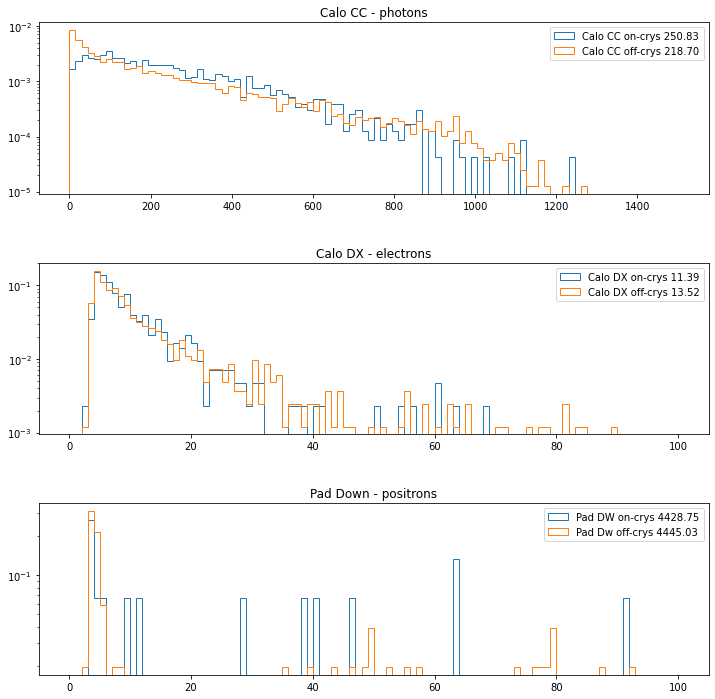

 mean ratio ON/OFF : PH 1.15 E1 0.84 PAD 1.00
 tot signal ratio ON/OFF : PH 1.15 E1 0.88 PAD 1.12


In [4]:
fig, ax = plt.subplots(3)
fig.set_size_inches(12,12)
fig.subplots_adjust(hspace=.4)
ax = ax.flatten()
nbins = 100


logi_extra = logi_cherry

logi_ph =  (abs((tm[:,2] - tm[:,6]) + 18.5) < 1.5)  ##- 17,-20 
logi_el =  (abs((tm[:,3] - tm[:,6]) + 18.5) < 1.5)  ##- 17,-20 
logi_pad =  (abs((tm[:,5] - tm[:,6])) < 2)  ## -2,+2

logi_oncryst = logi_pos & logi_extra
logi_offcryst = [not x for x in logi_oncryst] & logi_extra


mean_ph_oncrys  = np.mean(Calo_photon[logi_oncryst & logi_ph])
mean_ph_offcrys = np.mean(Calo_photon[logi_offcryst & logi_ph])

mean_e1_oncrys  = np.mean(Calo_elect1[logi_oncryst & logi_el])
mean_e1_offcrys  = np.mean(Calo_elect1[logi_offcryst & logi_el])

mean_pad_oncrys  = np.mean(Scinti_after_magnet[logi_oncryst & logi_pad])
mean_pad_offcrys  = np.mean(Scinti_after_magnet[logi_offcryst & logi_pad])

## CUT ON CRYSTAL
h_ph_oncrys = ax[0].hist(Calo_photon[logi_oncryst & logi_ph], bins = nbins, histtype = 'step', range = (0,1500), label=f'Calo CC on-crys {mean_ph_oncrys:.2f}' , density = True)
h_e1_oncrys = ax[1].hist(Calo_elect1[logi_oncryst & logi_el], bins = nbins, histtype = 'step', range =(0,100),   label=f'Calo DX on-crys {mean_e1_oncrys:.2f}' , density = True)
h_pad_oncrys = ax[2].hist(Scinti_after_magnet[logi_oncryst & logi_pad], bins = nbins, histtype = 'step', range =(0,100),   label=f'Pad DW on-crys {mean_pad_oncrys:.2f}' , density = True)

binc_h_ph_on = h_ph_oncrys[1][:-1] + (h_ph_oncrys[1][1] - h_ph_oncrys[1][0]) / 2
binc_h_e1_on = h_e1_oncrys[1][:-1] + (h_e1_oncrys[1][1] - h_e1_oncrys[1][0]) / 2
binc_h_pad_on = h_pad_oncrys[1][:-1] + (h_pad_oncrys[1][1] - h_pad_oncrys[1][0]) / 2

## CUT OUT CRYSTAL
h_ph_offcrys = ax[0].hist(Calo_photon[logi_offcryst & logi_ph], bins = nbins, histtype = 'step', range = (0,1500), label=f'Calo CC off-crys {mean_ph_offcrys:.2f}', density = True )
h_e1_offcrys = ax[1].hist(Calo_elect1[logi_offcryst & logi_el], bins = nbins, histtype = 'step', range =(0,100),   label=f'Calo DX off-crys {mean_e1_offcrys:.2f}', density = True)
h_pad_offcrys = ax[2].hist(Scinti_after_magnet[logi_offcryst & logi_pad], bins = nbins, histtype = 'step', range =(0,100),   label=f'Pad Dw off-crys {mean_pad_offcrys:.2f}' , density = True)

binc_h_ph_off = h_ph_offcrys[1][:-1] + (h_ph_offcrys[1][1] - h_ph_offcrys[1][0]) / 2
binc_h_e1_off = h_e1_offcrys[1][:-1] + (h_e1_offcrys[1][1] - h_e1_offcrys[1][0]) / 2
binc_h_pad_off = h_pad_offcrys[1][:-1] + (h_pad_offcrys[1][1] - h_pad_offcrys[1][0]) / 2


result_ph_oncrys = h_ph_oncrys[0] * binc_h_ph_on
result_e1_oncrys = h_e1_oncrys[0] * binc_h_e1_on
result_pad_oncrys = h_pad_oncrys[0] * binc_h_pad_on

result_ph_offcrys = h_ph_offcrys[0] * binc_h_ph_off
result_e1_offcrys = h_e1_offcrys[0] * binc_h_e1_off
result_pad_offcrys = h_pad_offcrys[0] * binc_h_pad_off

ax[0].legend()
ax[0].set_title('Calo CC - photons')
ax[0].set_yscale('log')
ax[1].legend()
ax[1].set_title('Calo DX - electrons')
ax[1].set_yscale('log')
ax[2].legend()
ax[2].set_title('Pad Down - positrons')
ax[2].set_yscale('log')

plt.show()
print(f' mean ratio ON/OFF : PH {mean_ph_oncrys/mean_ph_offcrys:.2f} E1 {mean_e1_oncrys/mean_e1_offcrys:.2f} PAD {mean_pad_oncrys/mean_pad_offcrys:.2f}')
print(f' tot signal ratio ON/OFF : PH {np.sum(result_ph_oncrys)/np.sum(result_ph_offcrys):.2f} E1 {np.sum(result_e1_oncrys)/np.sum(result_e1_offcrys):.2f} PAD {np.sum(result_pad_oncrys)/np.sum(result_pad_offcrys):.2f}')


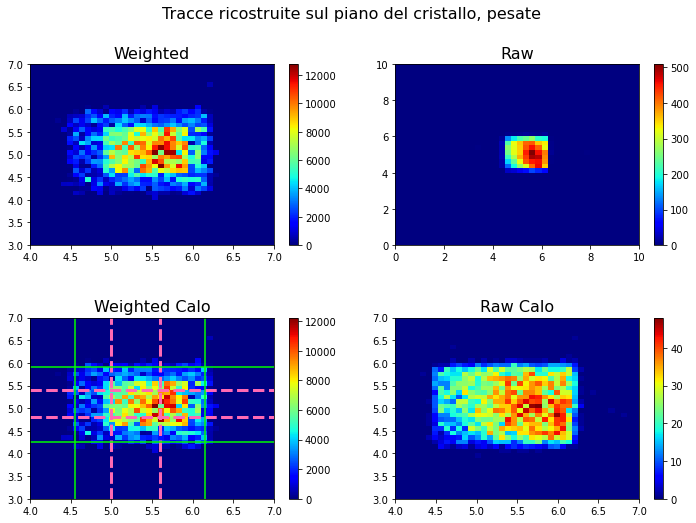

In [5]:
# x_cry, y_cry

fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,8)
fig.subplots_adjust(hspace=.4)
ax = ax.flatten()

hh = ax[0].hist2d(x_cry, y_cry, bins = 40, weights = Calo_photon,
                range = ((4,7),(3,7)),cmap = mycmap)
                # range = ((4,7),(3,7)),norm = mpl.colors.LogNorm(), cmap = mycmap)
                # range = ((0,10),(0,10)),norm = mpl.colors.LogNorm(), cmap = mycmap)
fig.colorbar(hh[3], ax = ax[0])

hh = ax[1].hist2d(x_cry, y_cry, bins = 40, 
                range = ((0,10),(0,10)), cmap = mycmap)
                # range = ((0,10),(0,10)),norm = mpl.colors.LogNorm(), cmap = mycmap)
fig.colorbar(hh[3], ax = ax[1])

ax[0].set_title("Weighted", fontsize = 16)
ax[1].set_title("Raw", fontsize = 16)
ax[2].axvline(x = pos_cut_x[0], ls = "--", lw = 3, c = "hotpink")
ax[2].axvline(x = pos_cut_x[1], ls = "--", lw = 3, c = "hotpink")
ax[2].axhline(y = pos_cut_y[0], ls = "--", lw = 3, c = "hotpink")
ax[2].axhline(y = pos_cut_y[1], ls = "--", lw = 3, c = "hotpink")

# logi_taglio = logi_cherry & (Scinti_after_magnet > 40)
logi_taglio = logi_cherry # & (Calo_elect1 > 80) #(Calo_photon < 40) & 

hh = ax[2].hist2d(x_cry[logi_taglio], y_cry[logi_taglio], bins = 40, weights = Calo_photon[logi_taglio],
                range = ((4,7),(3,7)), cmap = mycmap)
                # range = ((4,7),(3,7)),norm = mpl.colors.LogNorm(), cmap = mycmap)
                # range = ((0,10),(0,10)), cmap = mycmap)
fig.colorbar(hh[3], ax = ax[2])

hh = ax[3].hist2d(x_cry[logi_taglio], y_cry[logi_taglio], bins = 40, 
                range = ((4,7),(3,7)), cmap = mycmap)
                # range = ((4,7),(3,7)),norm = mpl.colors.LogNorm(), cmap = mycmap)
                # range = ((0,10),(0,10)),norm = mpl.colors.LogNorm(), cmap = mycmap)
fig.colorbar(hh[3], ax = ax[3])

# for a in ax:
#     a.set_xlabel(f"X {labels[i]}",fontsize = 14)
#     a.set_ylabel(f"Y {labels[i]}",fontsize = 14)

ax[2].set_title("Weighted Calo", fontsize = 16)
ax[3].set_title("Raw Calo", fontsize = 16)
ax[2].axvline(x = pos_cut_x[0], ls = "--", lw = 3, c = "hotpink")
ax[2].axvline(x = pos_cut_x[1], ls = "--", lw = 3, c = "hotpink")
ax[2].axhline(y = pos_cut_y[0], ls = "--", lw = 3, c = "hotpink")
ax[2].axhline(y = pos_cut_y[1], ls = "--", lw = 3, c = "hotpink")

x_c_min_at ,x_c_max_at, y_c_min_at, y_c_max_at = 4.55,6.15,4.25,5.90

ax[2].axvline(x_c_min_at, color='lime')
ax[2].axvline(x_c_max_at, color='lime')
ax[2].axhline(y_c_min_at, color='lime') 
ax[2].axhline(y_c_max_at, color='lime') 


fig.suptitle(f"Tracce ricostruite sul piano del cristallo, pesate ", fontsize = 16)

plt.show()

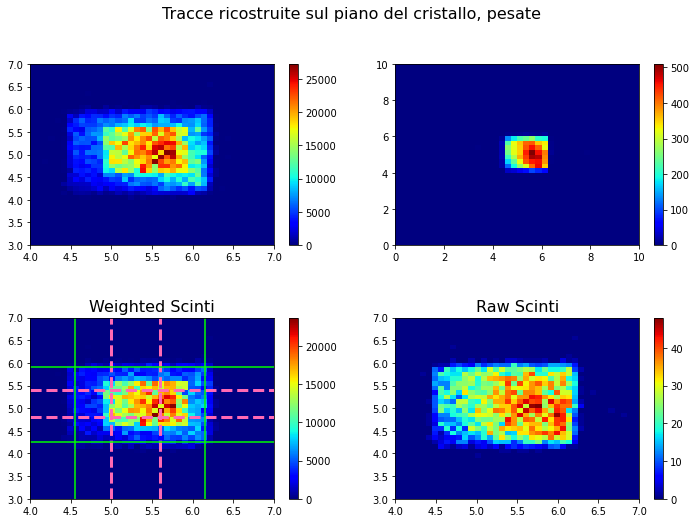

In [6]:
# x_cry, y_cry

fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,8)
fig.subplots_adjust(hspace=.4)
ax = ax.flatten()

hh = ax[0].hist2d(x_cry, y_cry, bins = 40, weights = Scinti_desy,
                range = ((4,7),(3,7)), cmap = mycmap)
                # range = ((4,7),(3,7)),norm = mpl.colors.LogNorm(), cmap = mycmap)
                # range = ((0,10),(0,10)),norm = mpl.colors.LogNorm(), cmap = mycmap)
fig.colorbar(hh[3], ax = ax[0])

hh = ax[1].hist2d(x_cry, y_cry, bins = 40, 
                range = ((0,10),(0,10)), cmap = mycmap)
                # range = ((0,10),(0,10)),norm = mpl.colors.LogNorm(), cmap = mycmap)
fig.colorbar(hh[3], ax = ax[1])

# ax[0].set_title("Weighted", fontsize = 16)
# ax[1].set_title("Raw", fontsize = 16)
# ax[0].axvline(x = 5.2, ls = "--", lw = 3, c = "hotpink")
# ax[0].axvline(x = 5.5, ls = "--", lw = 3, c = "hotpink")
# ax[0].axhline(y = 4.8, ls = "--", lw = 3, c = "hotpink")
# ax[0].axhline(y = 5.2, ls = "--", lw = 3, c = "hotpink")

# logi_taglio = logi_cherry & (Scinti_after_magnet > 40)
logi_taglio = logi_cherry # & (Calo_elect1 > 80) #(Calo_photon < 40) & 

hh = ax[2].hist2d(x_cry[logi_taglio], y_cry[logi_taglio], bins = 40, weights = Scinti_desy[logi_taglio],
                range = ((4,7),(3,7)), cmap = mycmap)
                # range = ((4,7),(3,7)),norm = mpl.colors.LogNorm(), cmap = mycmap)
                # range = ((0,10),(0,10)),cmap = mycmap)
fig.colorbar(hh[3], ax = ax[2])

hh = ax[3].hist2d(x_cry[logi_taglio], y_cry[logi_taglio], bins = 40, 
                range = ((4,7),(3,7)), cmap = mycmap)
                # range = ((4,7),(3,7)),norm = mpl.colors.LogNorm(), cmap = mycmap)
                # range = ((0,10),(0,10)),norm = mpl.colors.LogNorm(), cmap = mycmap)
fig.colorbar(hh[3], ax = ax[3])

# for a in ax:
#     a.set_xlabel(f"X {labels[i]}",fontsize = 14)
#     a.set_ylabel(f"Y {labels[i]}",fontsize = 14)

ax[2].set_title("Weighted Scinti", fontsize = 16)
ax[3].set_title("Raw Scinti", fontsize = 16)
ax[2].axvline(x = pos_cut_x[0], ls = "--", lw = 3, c = "hotpink")
ax[2].axvline(x = pos_cut_x[1], ls = "--", lw = 3, c = "hotpink")
ax[2].axhline(y = pos_cut_y[0], ls = "--", lw = 3, c = "hotpink")
ax[2].axhline(y = pos_cut_y[1], ls = "--", lw = 3, c = "hotpink")

# ax[2].axvline(x = 5.2, ls = "--", lw = 3, c = "hotpink")
# ax[2].axvline(x = 5.8, ls = "--", lw = 3, c = "hotpink")
# ax[2].axhline(y = 4.7, ls = "--", lw = 3, c = "hotpink")
# ax[2].axhline(y = 5.45, ls = "--", lw = 3, c = "hotpink")

x_c_min_at ,x_c_max_at, y_c_min_at, y_c_max_at = 4.55,6.15,4.25,5.90
ax[2].axvline(x_c_min_at, color='lime')
ax[2].axvline(x_c_max_at, color='lime')
ax[2].axhline(y_c_min_at, color='lime') 
ax[2].axhline(y_c_max_at, color='lime') 


fig.suptitle(f"Tracce ricostruite sul piano del cristallo, pesate ", fontsize = 16)

plt.show()

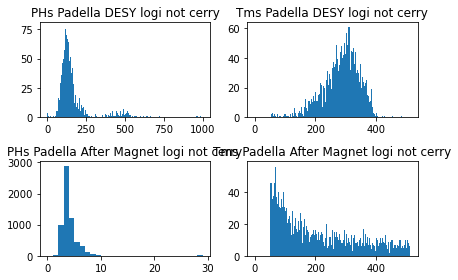

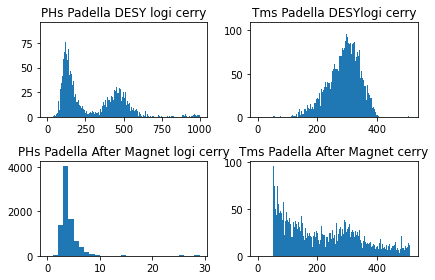

In [7]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
ax[0].hist(ph[:,7][np.logical_not(logi_cherry)], bins=np.arange(0,1000,1))
ax[1].hist(tm[:,7][np.logical_not(logi_cherry)], bins=np.arange(0,512,1))
ax[0].set_title('PHs Padella DESY logi not cerry')
ax[1].set_title('Tms Padella DESY logi not cerry')
ax[2].hist(ph[:,5][np.logical_not(logi_cherry)], bins=np.arange(0,30,1))
ax[3].hist(tm[:,5][np.logical_not(logi_cherry)], bins=np.arange(0,512,1))
ax[2].set_title('PHs Padella After Magnet logi not cerry')
ax[3].set_title('Tms Padella After Magnet logi not cerry')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2,2)
ax = ax.flatten()
ax[0].hist(ph[:,7][(logi_cherry)], bins=np.arange(0,1000,1))
ax[1].hist(tm[:,7][(logi_cherry)], bins=np.arange(0,512,1))
ax[0].set_title('PHs Padella DESY logi cerry')
ax[1].set_title('Tms Padella DESYlogi cerry')
ax[2].hist(ph[:,5][(logi_cherry)], bins=np.arange(0,30,1))
ax[3].hist(tm[:,5][(logi_cherry)], bins=np.arange(0,512,1))
ax[2].set_title('PHs Padella After Magnet logi cerry')
ax[3].set_title('Tms Padella After Magnet cerry')

plt.tight_layout()
plt.show()

(17042,)
(17042,)


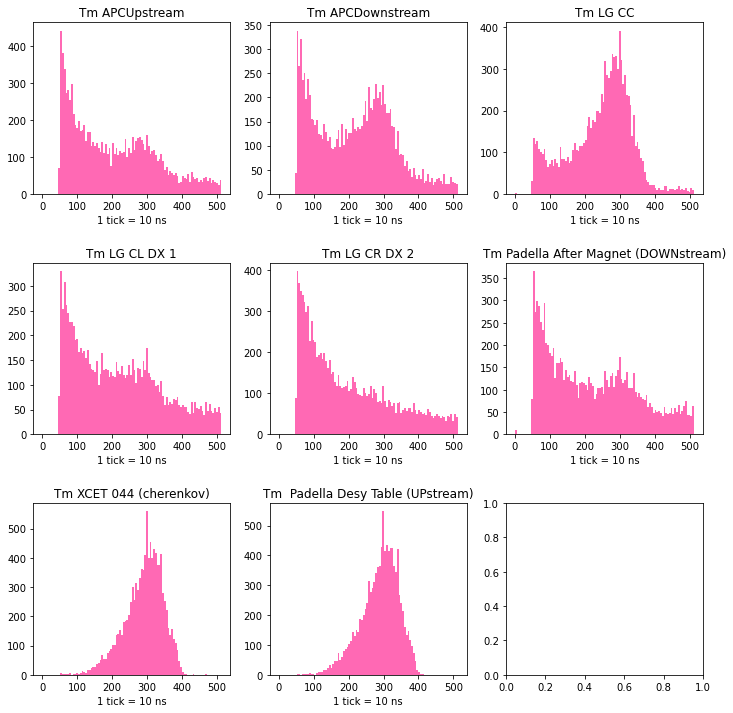

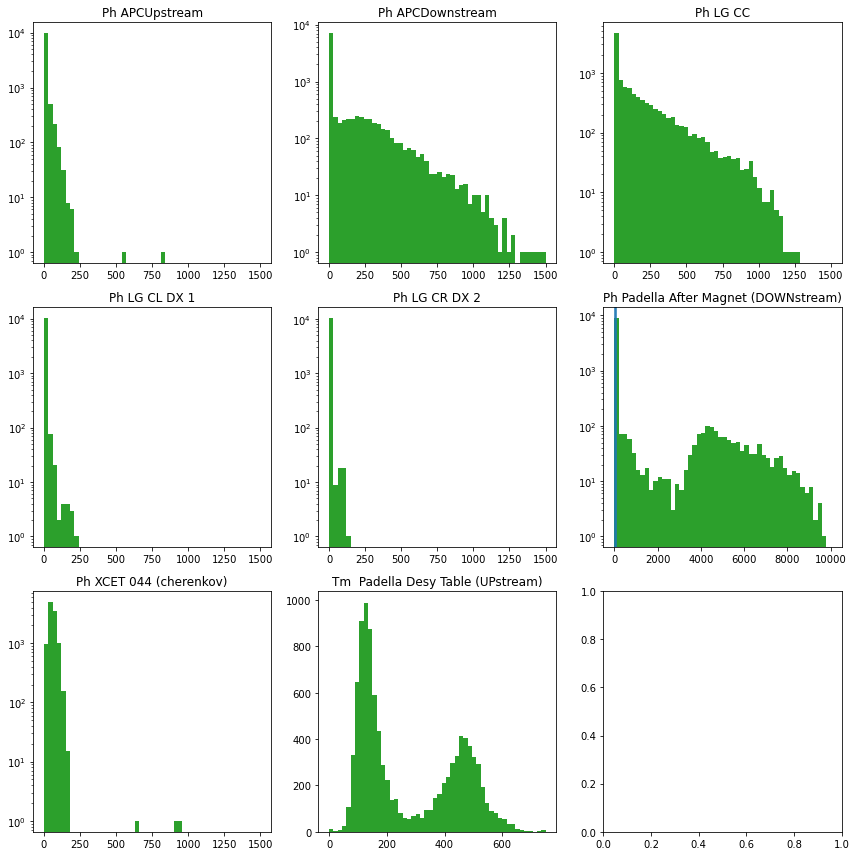

In [8]:
fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
fig.subplots_adjust(hspace=.4)

labels = [ 'APCUpstream','APCDownstream', 'LG CC', 'LG CL DX 1','LG CR DX 2', 'Padella After Magnet (DOWNstream)','XCET 044 (cherenkov)',' Padella Desy Table (UPstream)']

print(np.shape(tm[:,0]))
print(np.shape(logi_cherry))
######## TIMES ###########
for ch in range(0,8):
    ax = ax.flatten()
    h = ax[ch].hist(tm[:,ch][logi_cherry],bins=100, range=(0,512), label= labels[ch],color="hotpink" )
    ax[ch].set_title(f'Tm {labels[ch]}')
    ax[ch].set_xlabel(f'1 tick = 10 ns')

######## PHS ###########
fig1, ax1 = plt.subplots(3,3)
fig1.set_size_inches(12,12)
fig1.subplots_adjust(hspace=.4)
for ch in range(0,7):
    ax1 = ax1.flatten()
    if ch in [0,3,4]:
        h = ax1[ch].hist(ph[:,ch][logi_cherry],bins=50, range=(0,750), label= labels[ch],fc="tab:green")
    if ch == 5:
        h = ax1[ch].hist(ph[:,ch][logi_cherry],bins=50, range=(0,10000), label= labels[ch],fc="tab:green")
        ax1[ch].axvline(x = 50)
        ax1[ch].axvline(x = 80)
    else:
        h = ax1[ch].hist(ph[:,ch][logi_cherry],bins=50, range=(0,1500), label= labels[ch],fc="tab:green")
    ax1[ch].set_title(f'Ph {labels[ch]}')
    # ax1[ch].axvline(x = 50)
    # ax[ch].set_xlabel(f'Ph')
    ax1[ch].set_yscale('log')
    
ch = 7
h = ax1[ch].hist(ph[:,ch][logi_cherry],bins=50, range=(0,750), label= labels[ch],fc="tab:green")
ax1[ch].set_title(f'Tm {labels[ch]}')

plt.tight_layout()
plt.show()

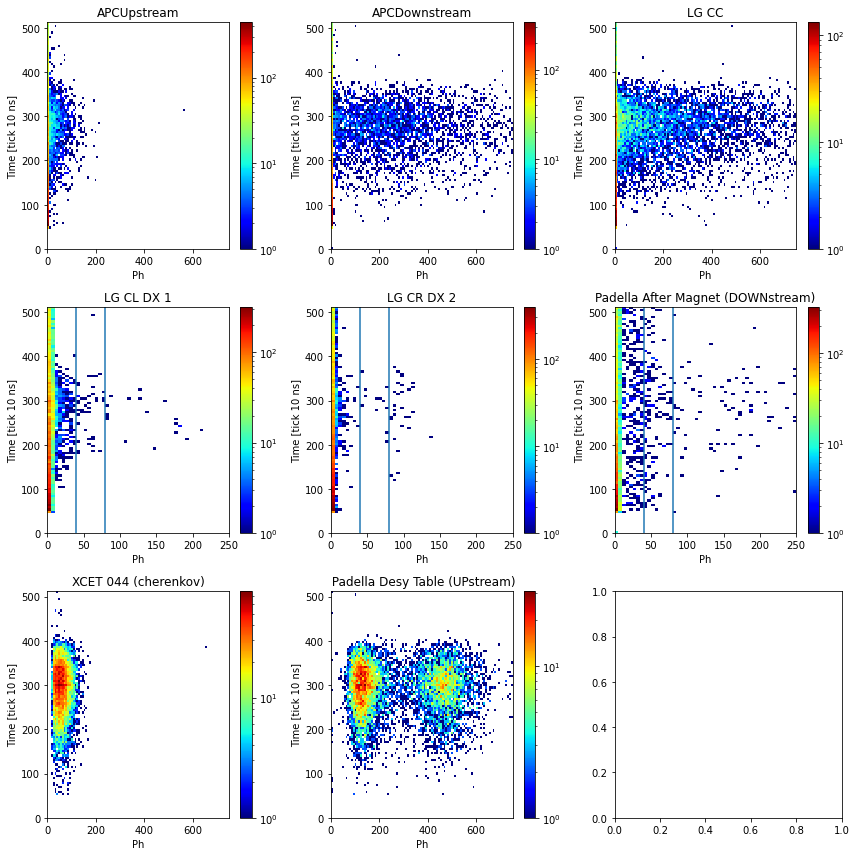

In [9]:
fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
labels = [ 'APCUpstream','APCDownstream', 'LG CC', 'LG CL DX 1','LG CR DX 2', 'Padella After Magnet (DOWNstream)','XCET 044 (cherenkov)',' Padella Desy Table (UPstream)']


# channel = 6
for ch in range(0,8):
    ax = ax.flatten()
    if ch  in [3,4,5]:
        h = ax[ch].hist2d(ph[:,ch][logi_cherry],tm[:,ch][logi_cherry],bins=[50,100], range=[[0,250],[0,512]], label= labels[ch], cmap = mycmap, norm = mpl.colors.LogNorm())
        ax[ch].axvline(x = 40)
        ax[ch].axvline(x = 80)
    else:
        h = ax[ch].hist2d(ph[:,ch][logi_cherry],tm[:,ch][logi_cherry],bins=[100,100], range=[[0,750],[0,512]], label= labels[ch], cmap = mycmap, norm = mpl.colors.LogNorm())
    # h = ax[ch].hist2d(ph[:,ch],tm[:,ch],bins=[100,100], range=[[0,1000],[0,512]], label= labels[ch], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[ch].set_title(f'{labels[ch]}')
    ax[ch].set_ylabel(f'Time [tick 10 ns]')
    ax[ch].set_xlabel(f'Ph')
    fig.colorbar(h[3], ax = ax[ch])    

plt.tight_layout()
plt.show()


In [10]:
count_tot = np.shape(ph[:,5])[0]
count_cherry = np.shape(ph[:,5][logi_cherry])[0]
cout_end = np.shape(ph[:,5][(logi_cherry) &(ph[:,5]>40)])[0]

print(count_tot,count_cherry,cout_end)
print(f'survival cherry {100*(count_cherry/count_tot):.2f} % - survival Ph {100*(cout_end/count_tot):.2f} %')
print(f'percentage electron survived cut {100*(cout_end/count_cherry):.2f} %')

17042 10569 1736
survival cherry 62.02 % - survival Ph 10.19 %
percentage electron survived cut 16.43 %


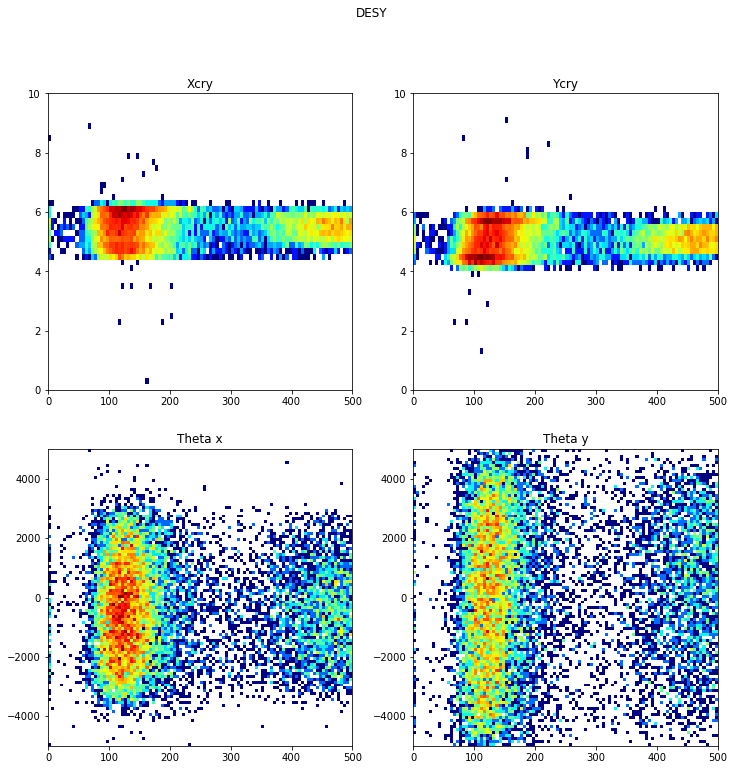

In [11]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,12)
fig.suptitle('DESY')
ax = ax.flatten()

taglio_ph = 40
logi_ph_positron = Scinti_after_magnet >2600
logi_ph_apc = Scinti_desy > 300

logi_3 = (logi_cherry) & (logi_ph_positron)

Con_taglio = False

if Con_taglio:
    ax[0].hist2d(Scinti_desy[logi_3],x_cry[logi_3],bins=[100,50], range=[[0,500],[0,10]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[1].hist2d(Scinti_desy[logi_3],y_cry[logi_3],bins=[100,50], range=[[0,500],[0,10]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[2].hist2d(Scinti_desy[logi_3],theta_in_x[logi_3],bins=[100,100], range=[[0,500],[-5000,5000]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[3].hist2d(Scinti_desy[logi_3],theta_in_y[logi_3],bins=[100,100], range=[[0,500],[-5000,5000]], cmap = mycmap, norm = mpl.colors.LogNorm())
else:
    ax[0].hist2d(Scinti_desy,x_cry,bins=[100,50], range=[[0,500],[0,10]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[1].hist2d(Scinti_desy,y_cry,bins=[100,50], range=[[0,500],[0,10]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[2].hist2d(Scinti_desy,theta_in_x,bins=[100,100], range=[[0,500],[-5000,5000]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[3].hist2d(Scinti_desy,theta_in_y,bins=[100,100], range=[[0,500],[-5000,5000]], cmap = mycmap, norm = mpl.colors.LogNorm())

ax[0].set_title('Xcry')
ax[1].set_title('Ycry')
ax[2].set_title('Theta x')
ax[3].set_title('Theta y')
plt.show()

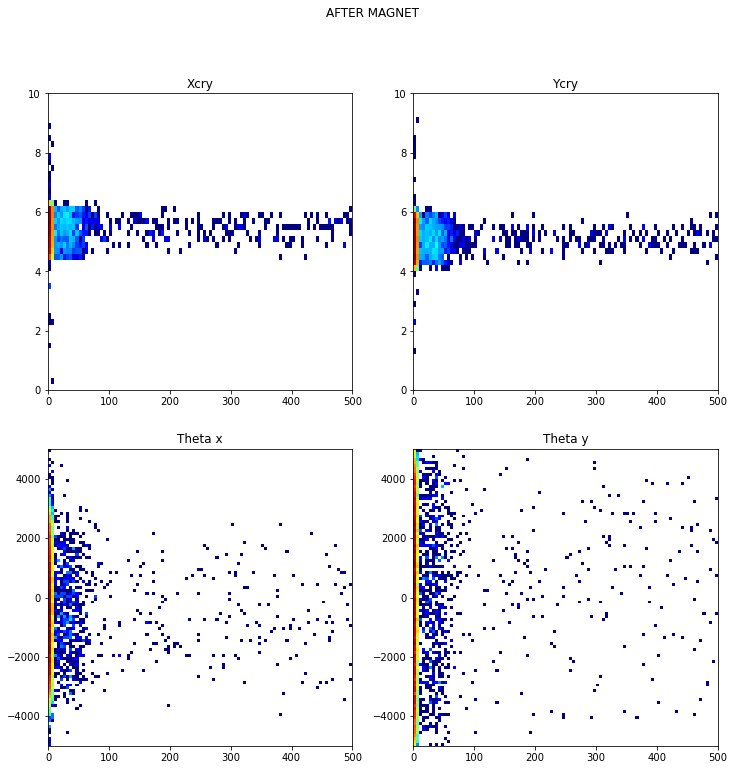

In [12]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,12)
fig.suptitle('AFTER MAGNET')
ax = ax.flatten()

taglio_ph = 40
logi_ph_positron = Scinti_after_magnet >40
logi_ph_apc = Scinti_desy > 300

logi_2 = (logi_cherry) & (logi_ph_positron)

Con_taglio = False

if Con_taglio:
    ax[0].hist2d(Scinti_after_magnet[logi_2],x_cry[logi_2],bins=[100,50], range=[[0,500],[0,10]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[1].hist2d(Scinti_after_magnet[logi_2],y_cry[logi_2],bins=[100,50], range=[[0,500],[0,10]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[2].hist2d(Scinti_after_magnet[logi_2],theta_in_x[logi_2],bins=[100,100], range=[[0,500],[-5000,5000]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[3].hist2d(Scinti_after_magnet[logi_2],theta_in_y[logi_2],bins=[100,100], range=[[0,500],[-5000,5000]], cmap = mycmap, norm = mpl.colors.LogNorm())
else:
    ax[0].hist2d(Scinti_after_magnet,x_cry,bins=[100,50], range=[[0,500],[0,10]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[1].hist2d(Scinti_after_magnet,y_cry,bins=[100,50], range=[[0,500],[0,10]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[2].hist2d(Scinti_after_magnet,theta_in_x,bins=[100,100], range=[[0,500],[-5000,5000]], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[3].hist2d(Scinti_after_magnet,theta_in_y,bins=[100,100], range=[[0,500],[-5000,5000]], cmap = mycmap, norm = mpl.colors.LogNorm())

ax[0].set_title('Xcry')
ax[1].set_title('Ycry')
ax[2].set_title('Theta x')
ax[3].set_title('Theta y')
plt.show()

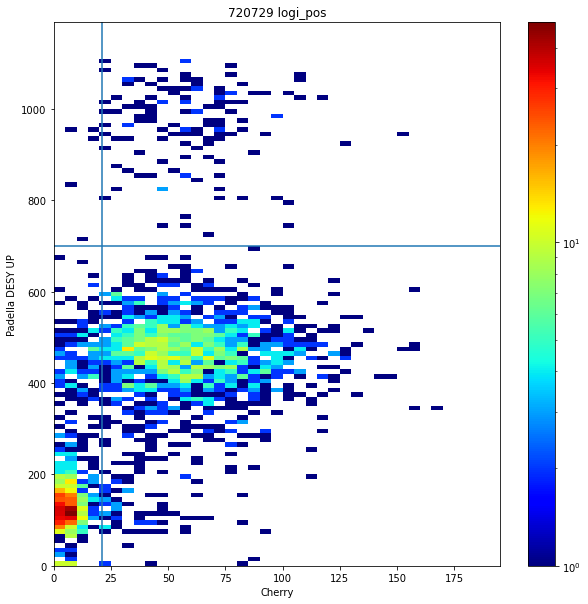

In [13]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10,10)
# logi_time = (tm[:,7]-tm[:,6] < 2.5) & (tm[:,7]-tm[:,6] > -2.5)
# logi = (logi_cherry) #& (logi_ph_positron)
logi = (logi_pos) #& (logi_ph_positron)

hh = ax.hist2d(Cherry1[logi],Scinti_desy[logi],bins= [np.arange(0,200,5),np.arange(0,1200,10)], cmap = mycmap, norm = mpl.colors.LogNorm())
ax.set_title(f'{run} logi_pos')
ax.set_xlabel(f'Cherry')
ax.set_ylabel(f'Padella DESY UP')
ax.axvline(x=21)
ax.axhline(y=700)
fig.colorbar(hh[3], ax = ax)
plt.show()


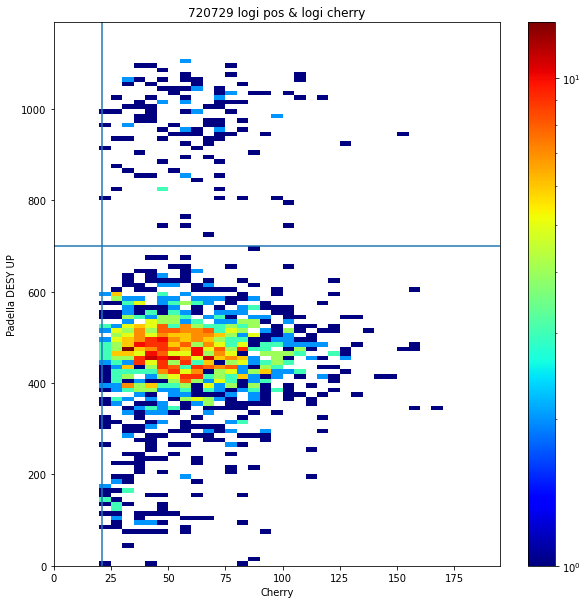

In [14]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10,10)
# logi_time = (tm[:,7]-tm[:,6] < 2.5) & (tm[:,7]-tm[:,6] > -2.5)
# logi = (logi_cherry) #& (logi_ph_positron)
logi = (logi_pos) & (logi_cherry)

hh = ax.hist2d(Cherry1[logi],Scinti_desy[logi],bins= [np.arange(0,200,5),np.arange(0,1200,10)], cmap = mycmap, norm = mpl.colors.LogNorm())
ax.set_title(f'{run} logi pos & logi cherry')
ax.set_xlabel(f'Cherry')
ax.set_ylabel(f'Padella DESY UP')
ax.axvline(x=21)
ax.axhline(y=700)
fig.colorbar(hh[3], ax = ax)
plt.show()


1611
152.42690888447345
30.65068493150685 %
30.65068493150685 %


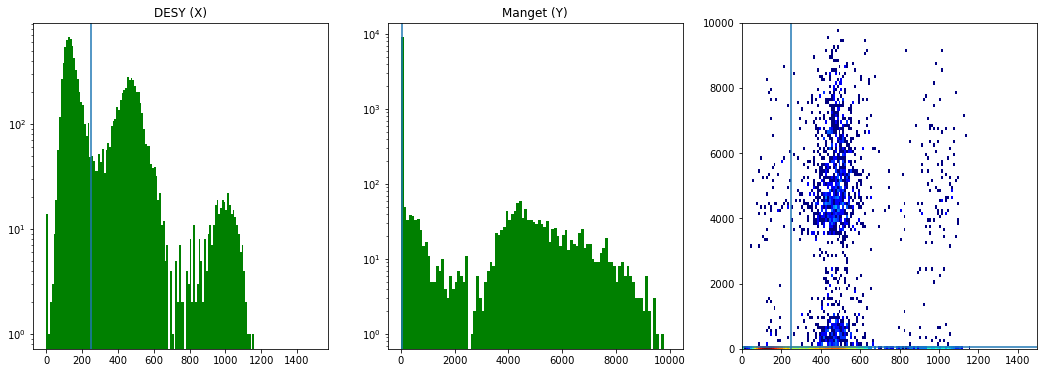

In [15]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(18,6)
# logi_time = (tm[:,7]-tm[:,6] < 2.5) & (tm[:,7]-tm[:,6] > -2.5)
# logi = (logi_cherry) #& (logi_ph_positron)
logi = (logi_cherry) #& (logi_ph_positron)

ax[0].hist(Scinti_desy[logi],bins=150, range=[0,1500],color = 'green')
ax[1].hist(Scinti_after_magnet[logi],bins=100, range=[0,10000], color = 'green')
ax[2].hist2d(Scinti_desy[logi],Scinti_after_magnet[logi],bins=[150,100], range=[[0,1500],[0,10000]], cmap = mycmap, norm = mpl.colors.LogNorm())
ax[0].set_yscale('log')
ax[0].set_title('DESY (X)')
ax[1].set_yscale('log')
ax[1].set_title('Manget (Y)')
ax[0].axvline(x=250)
ax[1].axvline(x=40)
ax[2].axvline(x=250)
ax[2].axhline(y=40)
logi_magnet = (Scinti_after_magnet[logi] > 40)
logi_desy = (Scinti_desy[logi] > 200)

# logi_fin = logi_magnet & logi_desy #& logi_time
# print(np.shape(Scinti_after_magnet[logi_fin]))
#ph_ = np.sum(Scinti_after_magnet[logi][Scinti_after_magnet[logi] > 40])
#ph_desy = np.sum(Scinti_desy[logi][Scinti_desy[logi] > 200])

numeratore = np.logical_and(logi_magnet,logi_desy).sum()
# numeratore = np.logical_and(logi_magnet,logi_desy).sum()
denominatore = logi_desy.sum()
print(numeratore)
print(1000*numeratore/(len(Scinti_after_magnet[logi])))
print(f'{100* numeratore/denominatore} %')
print(f'{100* numeratore/denominatore} %')
# ax.hist2d(Scinti_desy,Scinti_after_magnet,bins=[150,100], range=[[0,1500],[0,1000]], cmap = mycmap, norm = mpl.colors.LogNorm())
plt.show()

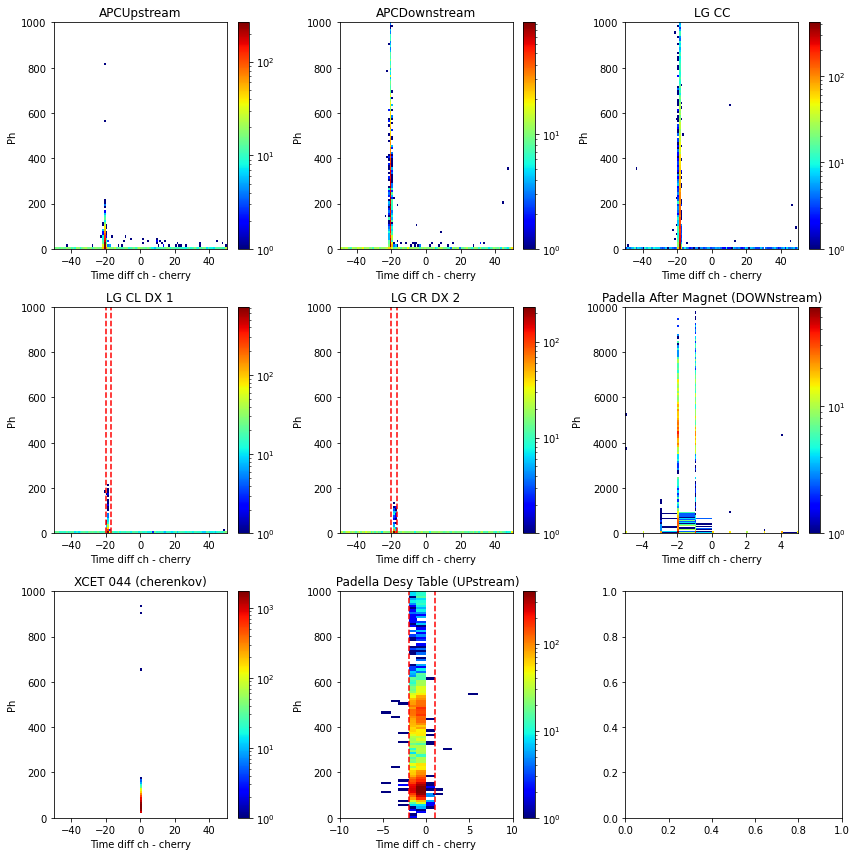

In [16]:
fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
labels = ['APCUpstream','APCDownstream', 'LG CC', 'LG CL DX 1','LG CR DX 2', 'Padella After Magnet (DOWNstream)','XCET 044 (cherenkov)',' Padella Desy Table (UPstream)']


# channel = 6
for ch in range(0,8):
    ax = ax.flatten()
    # h = ax[ch].hist2d((tm[:,ch] - tm[:,6]),ph[:,ch],bins=[100,100], range=[[-512,512],[0,1000]], label= labels[ch], cmap = mycmap, norm = mpl.colors.LogNorm())
    h = ax[ch].hist2d((tm[:,ch] - tm[:,6])[logi_cherry ],ph[:,ch][logi_cherry],bins=[100,100], range=[[-50,50],[0,1000]], label= labels[ch], cmap = mycmap, norm = mpl.colors.LogNorm())
    ax[ch].set_title(f'{labels[ch]}')
    ax[ch].set_ylabel(f'Ph')
    ax[ch].set_xlabel(f'Time diff ch - cherry')
    if ch !=7 and ch !=5  :
        fig.colorbar(h[3], ax = ax[ch])
    if (ch in [3,4,5]):
        ax[ch].axvline(x = -17,color='r',ls = '--')
        ax[ch].axvline(x = -20,color='r',ls = '--')
        # ax[ch].set_xlim(-30,-10)

ch = 5
# h = ax[ch].hist2d((tm[:,ch] - tm[:,6]),ph[:,ch],bins=[100,100], range=[[-512,512],[0,1000]], label= labels[ch], cmap = mycmap, norm = mpl.colors.LogNorm())
h = ax[ch].hist2d((tm[:,ch] - tm[:,6])[logi_cherry],ph[:,ch][logi_cherry],bins=[100,100], range=[[-5,5],[0,10000]], label= labels[ch], cmap = mycmap, norm = mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax[ch])

ch = 7
# h = ax[ch].hist2d((tm[:,ch] - tm[:,6]),ph[:,ch],bins=[100,100], range=[[-512,512],[0,1000]], label= labels[ch], cmap = mycmap, norm = mpl.colors.LogNorm())
h = ax[ch].hist2d((tm[:,ch] - tm[:,6])[logi_cherry],ph[:,ch][logi_cherry],bins=[50,100], range=[[-10,10],[0,1000]], label= labels[ch], cmap = mycmap, norm = mpl.colors.LogNorm())
ax[ch].axvline(x = -2,color='r',ls = '--')
ax[ch].axvline(x = 1,color='r',ls = '--')
# ax[ch].set_xlim(-30,-10)
fig.colorbar(h[3], ax = ax[ch])

plt.tight_layout()
plt.show()

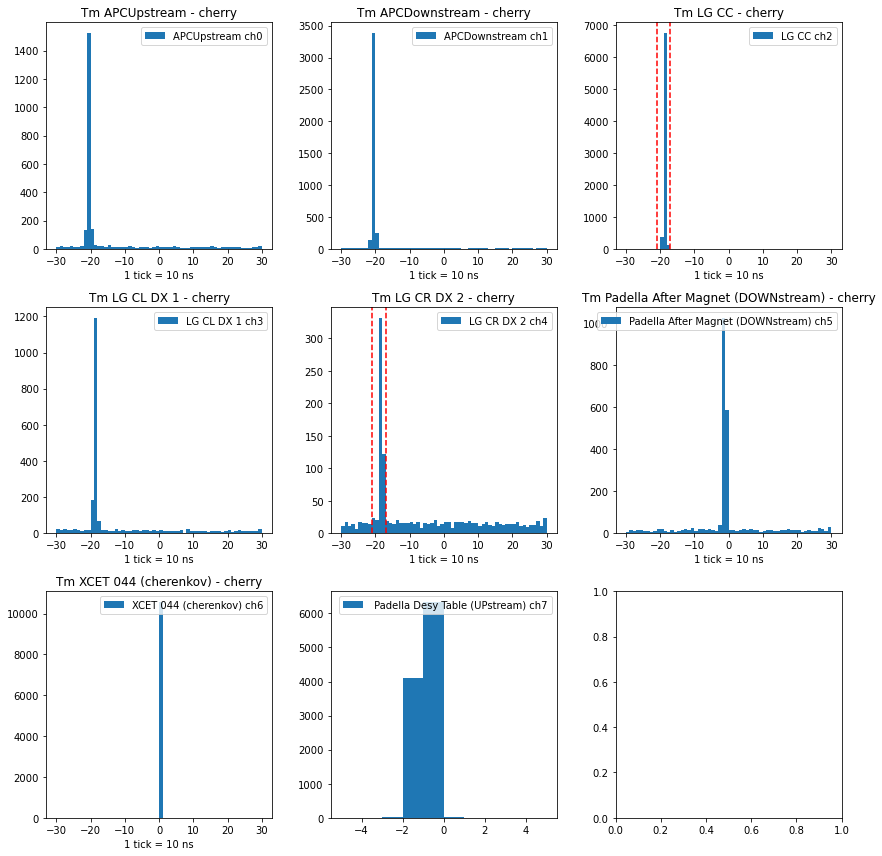

In [17]:
fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
labels = ['APCUpstream','APCDownstream', 'LG CC', 'LG CL DX 1','LG CR DX 2', 'Padella After Magnet (DOWNstream)','XCET 044 (cherenkov)',' Padella Desy Table (UPstream)']

    
# channel = 6
for ch in range(0,7):
    ax = ax.flatten()
    # h = ax[ch].hist((tm[:,6]-tm[:,ch]), bins=100, range=(0,1000), label= labels[ch],)
    h = ax[ch].hist((tm[:,ch]-tm[:,6])[logi_cherry], bins=60, range=(-30,30), label= labels[ch] + f' ch{ch}')
    ax[ch].set_title(f'Tm {labels[ch]} - cherry')
    ax[ch].set_xlabel(f'1 tick = 10 ns')
    ax[ch].legend()
    if (ch == 2) or (ch == 4):
        ax[ch].axvline(x = -17,color='r',ls = '--')
        ax[ch].axvline(x = -21,color='r',ls = '--')

ch = 7
h = ax[ch].hist((tm[:,ch]-tm[:,6])[logi_cherry], bins=10, range=(-5,5), label= labels[ch] + f' ch{ch}')
ax[ch].legend()

plt.tight_layout()
plt.show()

In [18]:
# fig, ax = plt.subplots(1)
# fig.set_size_inches(12,12)

# h = ax.hist2d(Calo_photon,Calo_elect1,bins=[100,100],range = [[0,6.5],[0,6.5]], cmap = mycmap, norm = mpl.colors.LogNorm())
# # h = ax.hist2d(ph[:,2],ph[:,3],bins=[1000,1000], cmap = mycmap )#, norm = mpl.colors.LogNorm())

# fig.colorbar(h[3], ax = ax)

# plt.show()

In [19]:
# fig, ax = plt.subplots(1,2)
# fig.set_size_inches(18,6)

# pos_p,xinfo_p,ph_p,tm_p,evi_p,info_plus_p,_,_,_,_,_,_,_,_,_, _,_,_,_,_,_,_,_= file_corrector(720372)
# hh = ax[0].hist2d(ph_p[:,19],ph_p[:,31],bins= [np.arange(0,1000,10),np.arange(1300,4000,50)], cmap = mycmap, norm = mpl.colors.LogNorm())
# ax[0].set_title(f'run 720372 6 GeV Parallel oreo')
# ax[0].set_xlabel(f'Cherry')
# ax[0].set_ylabel(f'Canadese')

# pos_f,xinfo_f,ph_f,tm_f,evi_f,info_plus_f,_,_,_,_,_,_,_,_,_, _,_,_,_,_,_,_,_= file_corrector(720345)
# hh = ax[1].hist2d(ph_f[:,19],ph_f[:,31],bins= [np.arange(0,1000,10),np.arange(1300,4000,50)], cmap = mycmap, norm = mpl.colors.LogNorm())
# ax[1].set_title(f'run 720345 6 GeV Focussed oreo')
# ax[1].set_xlabel(f'Cherry')
# ax[1].set_ylabel(f'Canadese')

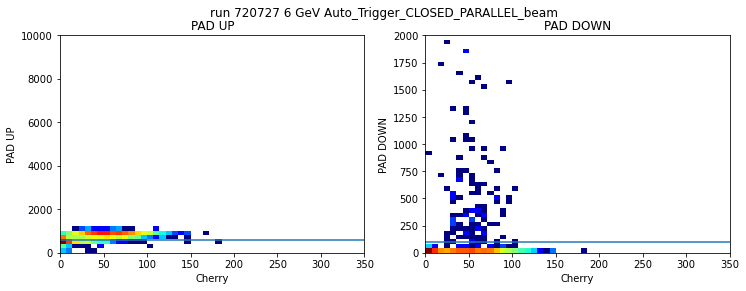

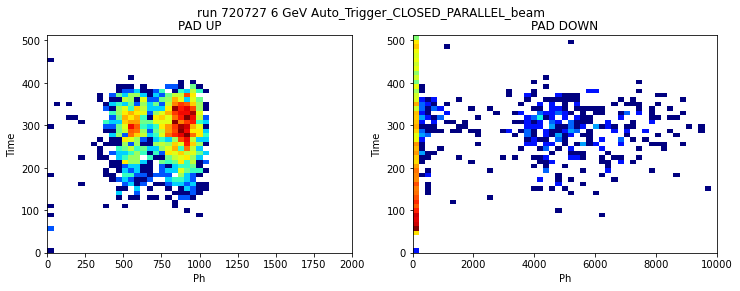

In [20]:
# run_scinti = 720705
run_scinti = 720727
# set = 'Auto_Trigger_OPEN_PARALLEL_beam'

# run_scinti = 720707
set = 'Auto_Trigger_CLOSED_PARALLEL_beam'

# run_scinti = 720708
# set = 'Auto_Trigger_CLOSED_FOCUSSED_beam'

# run_scinti = 720709
# set = 'Auto_Trigger_OPEN_FOCUSSED_beam'
# 
# fig, ax = plt.subplots(1,3)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,4)
fig.suptitle(f'run {run_scinti} 6 GeV {set}')
# fig2, ax2 = plt.subplots(1,3)
fig2, ax2 = plt.subplots(1,2)
fig2.set_size_inches(12,4)
fig2.suptitle(f'run {run_scinti} 6 GeV {set}')

pos,xinfo,ph,tm,evi,infolus,_,_,_,_,_,_,_,_,_, _,_,_,_,_,_,_,_= file_corrector(run_scinti)
# hh = ax[0].hist2d(ph[:,6],ph[:,7],bins= [np.arange(0,350,10),np.arange(0,2000,50)], cmap = mycmap, norm = mpl.colors.LogNorm())
hh = ax[0].hist2d(ph[:,6],ph[:,7],bins= [np.linspace(0,350,50),np.linspace(0,10000,50)], cmap = mycmap, norm = mpl.colors.LogNorm())

ax[0].set_title(f'PAD UP')
ax[0].set_xlabel(f'Cherry')
ax[0].set_ylabel(f'PAD UP')
ax[0].axhline(y=600)

# hh = ax[1].hist2d(ph[:,6],ph[:,5],bins= [np.arange(0,350,10),np.arange(0,2000,50)], cmap = mycmap, norm = mpl.colors.LogNorm())
hh = ax[1].hist2d(ph[:,6],ph[:,5],bins= [np.linspace(0,350,50),np.linspace(0,2000,50)], cmap = mycmap, norm = mpl.colors.LogNorm())
ax[1].set_title(f'PAD DOWN')
ax[1].set_xlabel(f'Cherry')
ax[1].set_ylabel(f'PAD DOWN')
ax[1].axhline(y=100)

# # hh = ax[2].hist2d(ph[:,6],ph[:,4],bins= [np.arange(0,350,10),np.arange(0,12000,50)], cmap = mycmap, norm = mpl.colors.LogNorm())
# hh = ax[2].hist2d(ph[:,6],ph[:,4],bins= [np.linspace(0,350,50),np.linspace(0,12000,50)], cmap = mycmap, norm = mpl.colors.LogNorm())
# ax[2].set_title(f'Canadese')
# ax[2].set_xlabel(f'Cherry')
# ax[2].set_ylabel(f'Canadese')
# ax[2].axhline(y=4000)
# fig.savefig(f'{run_scinti}-{set}-2d.jpg',dpi=300)

###########################################

pos,xinfo,ph,tm,evi,infolus,_,_,_,_,_,_,_,_,_, _,_,_,_,_,_,_,_= file_corrector(run_scinti)

hh = ax2[0].hist2d(ph[:,7],tm[:,7],bins= [np.linspace(0,2000,50),np.linspace(0,512,50),], cmap = mycmap, norm = mpl.colors.LogNorm())
ax2[0].set_title(f'PAD UP')
ax2[0].set_xlabel(f'Ph')
ax2[0].set_ylabel(f'Time')

hh = ax2[1].hist2d(ph[:,5],tm[:,5],bins= [np.linspace(0,10000,50),np.linspace(0,512,50)], cmap = mycmap, norm = mpl.colors.LogNorm())
ax2[1].set_title(f'PAD DOWN')
ax2[1].set_xlabel(f'Ph')
ax2[1].set_ylabel(f'Time')

# hh = ax2[2].hist2d(ph[:,4],tm[:,4],bins= [np.linspace(0,12000,50),np.linspace(0,512,50)], cmap = mycmap, norm = mpl.colors.LogNorm())
# ax2[2].set_title(f'Canadese')
# ax2[2].set_xlabel(f'Ph')
# ax2[2].set_ylabel(f'Time')

fig2.savefig(f'{run_scinti}-{set}.jpg',dpi=300)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 11419 but corresponding boolean dimension is 17042

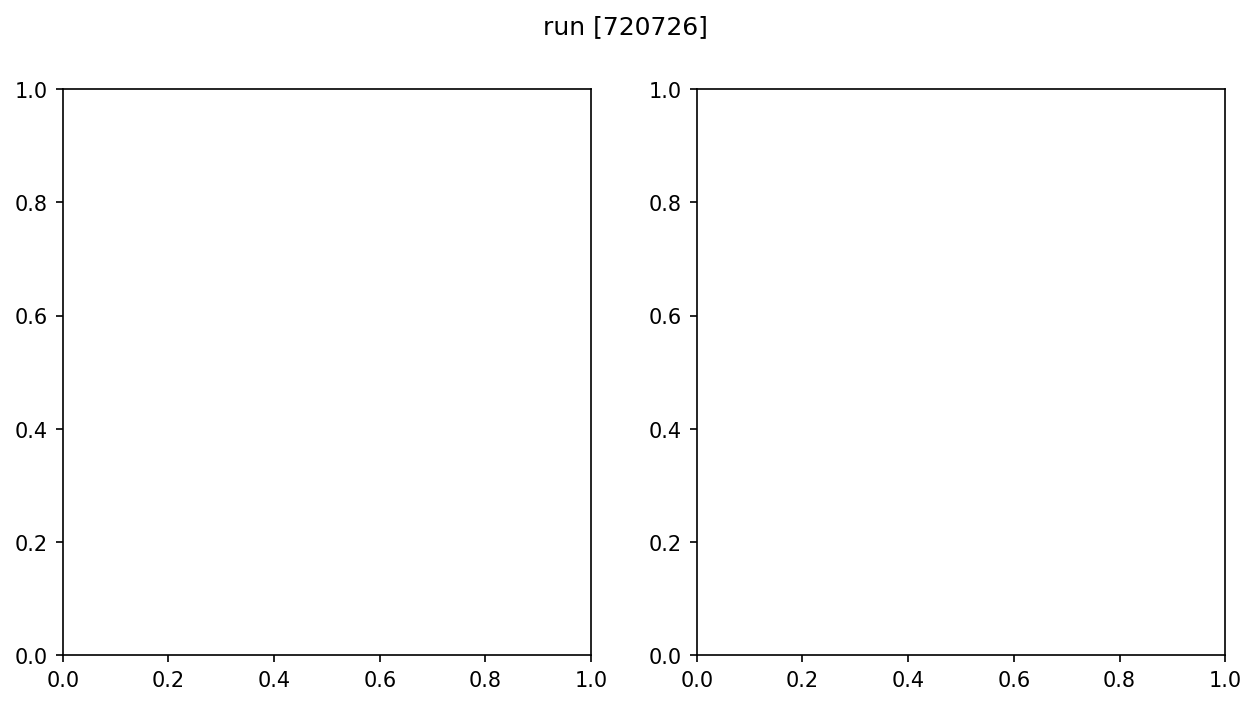

In [21]:
# run_scinti = [720710,720713,720714,720716]
# set = ['base','inverted all','inverted power','reverted']
run_scinti = [720726]
set = ['a','b','c']
lstiles=['-','-','-', '-']
if len(lstiles) < len(run_scinti) : lstiles.append(lstiles[-1])
opts = {"facecolor":'none',"density": True, "lw": 2}
th_pad_UP = 200
th_pad_DW = 3000
th_pad_LG_DX_DX = 1500
# fig, ax = plt.subplots(1,3, dpi = 300)
fig, ax = plt.subplots(1,2, dpi = 150)
fig.set_size_inches(10,5)
fig.suptitle(f'run {run_scinti}')
for i, r in enumerate(run_scinti):
    pos,xinfo,ph,tm,evi,infolus,_,_,_,_,_,_,_,_,_, _,_,_,_,_,_,_,_= file_corrector(r)
    h = ax[0].hist(ph[:,7][logi_cherry],bins= np.linspace(0,2000,50),label=f'{set[i]} - ave{np.mean(ph[:,7][ph[:,7]>th_pad_UP]):.2f}' , histtype = 'step', ls=lstiles[i],**opts)
    
    # ax[0].axvline(x=750, c='k')
    ax[0].set_title(f'Ph7 Padella UP')
    ax[0].set_xlabel(f'ph')
    ax[0].axvline(x=th_pad_UP, c='k')

    h = ax[1].hist(ph[:,5][logi_cherry], bins= np.linspace(0,10000,50),label=f'{set[i]} - ave{np.mean(ph[:,5][ph[:,5]>th_pad_DW]):.2f}' , histtype = 'step', ls=lstiles[i],**opts)
    ax[1].set_title(f'pH5  CANADESE DOWN')
    ax[1].set_xlabel(f'ph')
    ax[1].axvline(x=th_pad_DW, c='k' )
    
    # h = ax[2].hist(ph[:,4], bins= np.linspace(0,15000,50),label=f'{set[i]} - ave{np.mean(ph[:,4][ph[:,4]>th_pad_LG_DX_DX]):.2f}', histtype = 'step',ls=lstiles[i],**opts)
    # ax[2].set_title(f'LG DX DX')
    # ax[2].set_xlabel(f'ph')
    # ax[2].axvline(x=th_pad_LG_DX_DX, c='k')
    for a in ax:
        a.grid()
        a.set_yscale('log') 
        a.set_ylabel('#')
        a.legend()
plt.tight_layout()        
plt.show()
#fig.savefig(f'{run_scinti}-1d.jpg',dpi=300)

In [ ]:
print(np.max('pippo'))

In [ ]:
# run_ongoing=720727
run_ongoing=720730
# ,720706
# run_ongoing=[720705,720706]
th_cherry = 21
fig, ax = plt.subplots(2)
fig.set_size_inches(6,6)
fig.suptitle(f'run {run_ongoing}')

pos,xinfo,ph,tm,evi,infoplus,_,_,_,_,_,_,_,_,_, _,_,_,_,_,_,_,_= file_corrector(run_ongoing)
logi_cherry = (ph[:,6] > th_cherry)

hh = ax[0].hist2d(evi[logi_cherry],ph[:,7][logi_cherry],bins= [np.arange(0,np.max(evi),50),np.linspace(0,1500,100)], cmap = mycmap, norm = mpl.colors.LogNorm())

h  = ax[1].hist  (ph[:,7][logi_cherry],bins= np.linspace(0,1500,100))
# ax.set_title(f'Padella over event number')
# ax.set_ylabel(f'Event numb')
ax[0].set_title(f'Padella UP over spill number')
ax[0].set_xlabel(f'Ph Padella UP')
ax[0].set_ylabel(f'Spill number')
ax[1].set_title(f'Ph Padella UP')
ax[1].set_xlabel(f'Ph Padella UP')
plt.tight_layout()
plt.show()